# Multivariate Normal Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import norm

In [2]:
x = np.array([1, 2, 3])

print(x.__class__)
print(x.shape)
print(x.ndim)

<class 'numpy.ndarray'>
(3,)
1


In [3]:
x = np.array([[1, 2, 3]])

print(x.__class__)
print(x.shape)
print(x.ndim)

<class 'numpy.ndarray'>
(1, 3)
2


In [4]:
W = np.array([[1, 2, 3],
              [4, 5, 6]])
print(W.ndim)
print(W.shape)

2
(2, 3)


In [5]:
# element-wise operation
W = np.array([[1, 2, 3], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])
print(W + X)
print('---')
print(W * X)

[[ 1  3  5]
 [ 7  9 11]]
---
[[ 0  2  6]
 [12 20 30]]


In [6]:
# inner product
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
y = np.dot(a, b)
print(y)
print(a @ b)

32
32


In [7]:
# matrix multiplication
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
Y = np.dot(A, B)
print(Y)
print(A @ B)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


In [8]:
# transpose
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A)
print('---')
print(A.T)

[[1 2 3]
 [4 5 6]]
---
[[1 4]
 [2 5]
 [3 6]]


In [9]:
# determinant
A = np.array([[3, 4], [5, 6]])
d = np.linalg.det(A)
print(d)

-2.0000000000000004


In [10]:
# inverse matrix
A = np.array([[3, 4], [5, 6]])
B = np.linalg.inv(A)

print(B)
print('---')
print(A @ B)

[[-3.   2. ]
 [ 2.5 -1.5]]
---
[[ 1.00000000e+00  0.00000000e+00]
 [-1.77635684e-15  1.00000000e+00]]


In [11]:
# multivariate normal distribution
def multivariate_normal(x, mu, cov):
    D = len(x)
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)

    a = 1 / np.sqrt((2 * np.pi)** D * det)
    b = np.exp( -(x - mu).T @ inv @ (x - mu) / 2.0)

    return a * b

In [12]:
x = np.array([0, 0])
mu = np.array([1, 2])
cov = np.array([[1, 0],
               [0, 1]])

y = multivariate_normal(x, mu, cov)
print(y)

0.013064233284684921


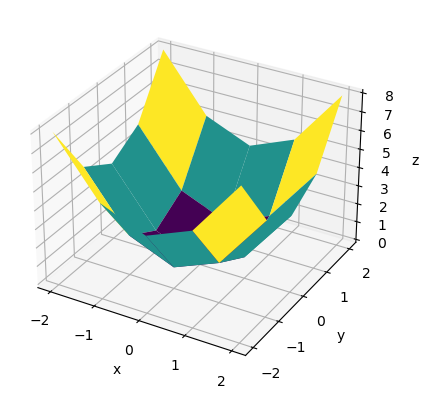

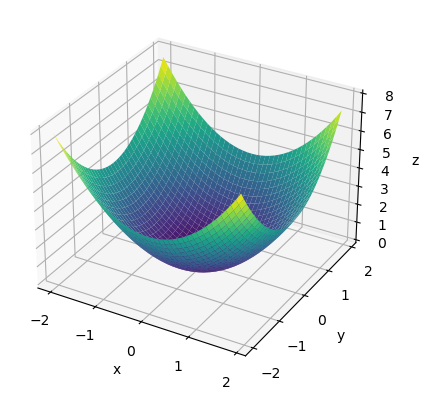

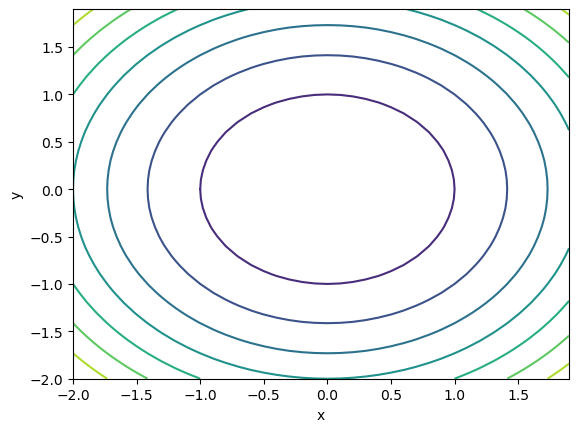

In [13]:
X = np.array([[-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2]])
Y = np.array([[-2, -2, -2, -2, -2],
              [-1, -1, -1, -1, -1],
              [0, 0, 0, 0, 0],
              [1, 1, 1, 1, 1],
              [2, 2, 2, 2, 2]])

Z = X ** 2 + Y ** 2

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# ===== better resolution =====
xs = np.arange(-2, 2, 0.1)
ys = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(xs, ys)
Z = X ** 2 + Y ** 2

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# ===== plot contour =====
xs = np.arange(-2, 2, 0.1)
ys = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(xs, ys)
Z = X ** 2 + Y ** 2

ax = plt.axes()
ax.contour(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

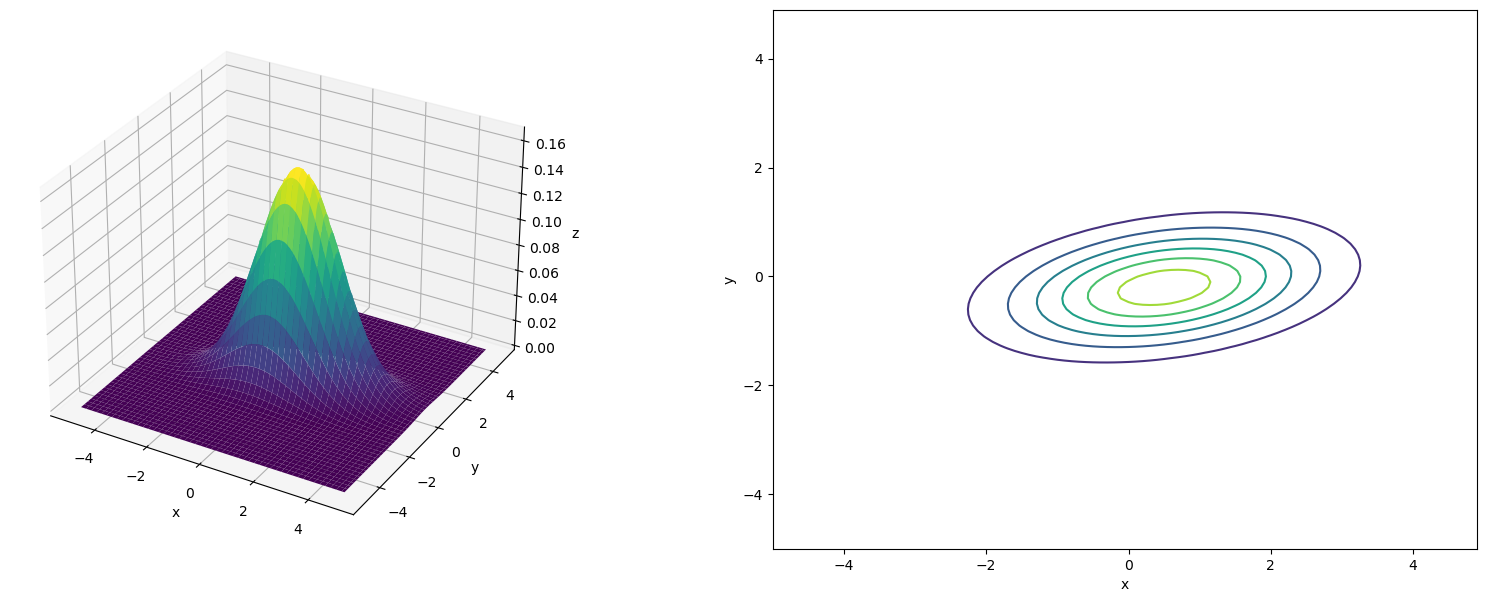

In [14]:
mu = np.array([0.5, -0.2])
cov = np.array([[2.0, 0.3],
                [0.3, 0.5]])

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure(figsize=(20, 7))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)

plt.show()

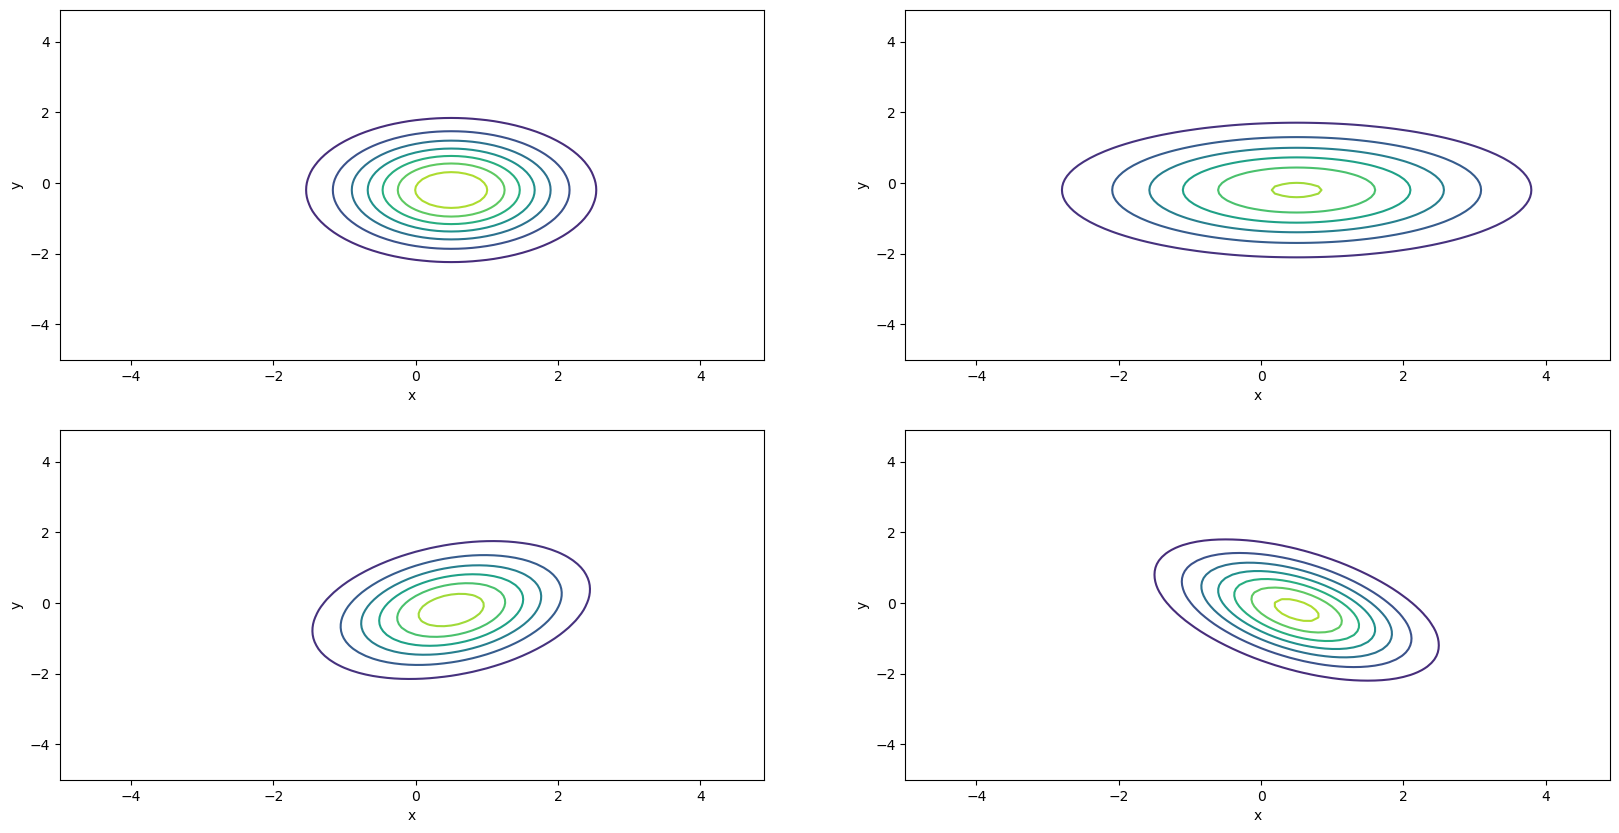

In [15]:
mu = np.array([0.5, -0.2])
cov = np.array([[[1.0, 0.0],
                 [0.0, 1.0]],
                [[3.0, 0.0],
                 [0.0, 1.0]],
                [[1.0, 0.3],
                 [0.3, 1.0]],
                [[1.0, -0.5],
                 [-0.5, 1.0]]])

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)

fig = plt.figure(figsize=(20, 10))

for cov_temp in range(cov.shape[0]):
    Z = np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            x = np.array([X[i, j], Y[i, j]])
            Z[i, j] = multivariate_normal(x, mu, cov[cov_temp])

    ax2 = fig.add_subplot(2, 2, cov_temp+1)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.contour(X, Y, Z)

plt.show()

In [16]:
np.random.seed(0)

N = 10000
D = 2
xs = np.random.rand(N, D)

mu = np.sum(xs, axis=0) / N
cov = 0

for n in range(N):
    x = xs[n]
    z = x - mu
    z = z[:, np.newaxis]
    cov += z * z.T

cov /= N

print(mu)
print(cov)

[0.49443495 0.49726356]
[[ 0.08476319 -0.00023128]
 [-0.00023128  0.08394656]]


In [17]:
mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)

print(mu)
print(cov)

[0.49443495 0.49726356]
[[ 0.08477167 -0.0002313 ]
 [-0.0002313   0.08395496]]


(25000, 2)


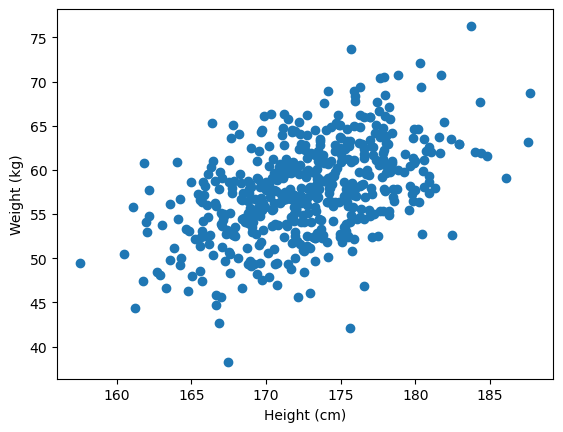

In [18]:
file_temp = 'height_weight.txt'
file = os.path.join(os.getcwd(), file_temp)
xs = np.loadtxt(file)

print(xs.shape)

small_xs = xs[:500]
plt.scatter(small_xs[:, 0], small_xs[:, 1])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

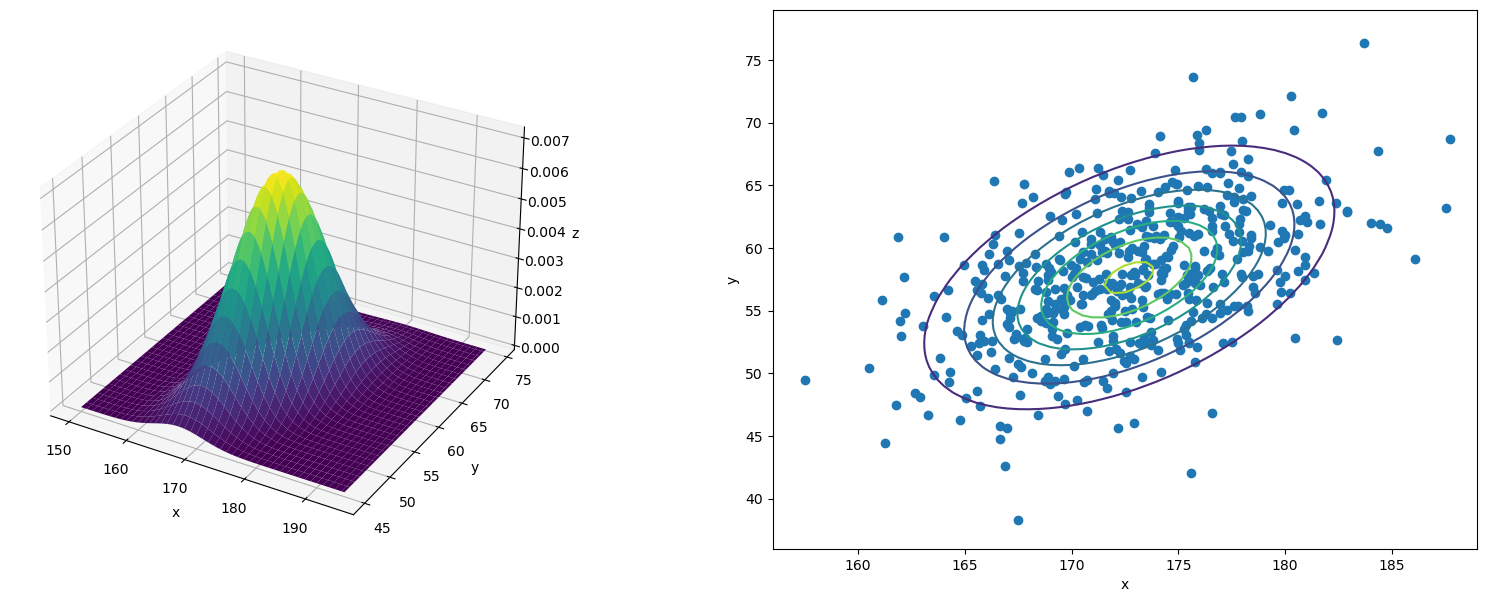

In [19]:
file_temp = 'height_weight.txt'
file = os.path.join(os.getcwd(), file_temp)
xs = np.loadtxt(file)

# Maximum Likelihood Estimation(MLE)
mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)

small_xs = xs[:500]
X, Y = np.meshgrid(np.arange(150, 195, 0.5),
                   np.arange(45, 75, 0.5))
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure(figsize=(20, 7))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(small_xs[:,0], small_xs[:,1])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(156, 189)
ax2.set_ylim(36, 79)
ax2.contour(X, Y, Z)

plt.show()